In [3]:
from PIL import Image

for i in range(1, 6):
    img = Image.open("IMAGE/0"+str(i)+".png")
    width, height = img.size
    print("Image size: {}x{}".format(width, height))


Image size: 2828x2663
Image size: 2828x2663
Image size: 2828x2663
Image size: 2828x2663
Image size: 2828x2663


In [4]:
import os
import torch
from ultralytics import YOLO

In [5]:
import glob
import cv2

# loading a custom model
model = YOLO('new_yolov8_best.pt')

In [6]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [7]:
import os


file_path = 'IMAGE/01.png'
if os.path.exists(file_path):
    print(f"File '{file_path}' exists!")
else:
    print(f"File '{file_path}' does not exist.")

File 'IMAGE/01.png' exists!


In [8]:
results = model(file_path)  # predict on an image


image 1/1 c:\Users\timmy\Downloads\weed_detect\IMAGE\01.png: 608x640 20 Weeds, 629.0ms
Speed: 13.3ms preprocess, 629.0ms inference, 2538.4ms postprocess per image at shape (1, 3, 608, 640)


In [9]:
# Define paths
path_to_test_dataset = 'IMAGE/'
path_to_store_bounding_boxes = 'detect/'


In [11]:


# Ensure the output directories exist
os.makedirs(path_to_store_bounding_boxes, exist_ok=True)

# List to hold all detections for saving to a single JSON file
all_detections = []

# Mapping of class labels to readable names (assuming 'weeds' is class 1)
class_names = ["citrus area", "trees", "weeds", "weeds and trees"]

for image_path in glob.glob(path_to_test_dataset + "*.png"):
    image = cv2.imread(image_path)
    imagename_withoutextension = os.path.splitext(os.path.basename(image_path))[0]
    results = model.predict(image_path, imgsz=640, conf=0.25, iou=0.45)
    results = results[0]  

    detections = []

    for box in results.boxes:
        tensor = box.xyxy[0]
        x1 = int(tensor[0].item())
        y1 = int(tensor[1].item())
        x2 = int(tensor[2].item())
        y2 = int(tensor[3].item())
        conf = box.conf[0].item()  # Confidence score
        label = box.cls[0].item()  # Class label

        # Only process if the detected class is "weeds"
        if class_names[int(label)] == "weeds":
            # Draw bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 255), 3)   

            # Append the detection result to the list
            detections.append({
                "label": "weeds",
                "confidence": conf,
                "bbox": [x1, y1, x2, y2]
            })

    # Save the image with bounding boxes
    cv2.imwrite(os.path.join(path_to_store_bounding_boxes, imagename_withoutextension + ".png"), image)

    # Append detections for this image to the all_detections list
    if detections:
        all_detections.append({
            "image": imagename_withoutextension + ".png",
            "detections": detections
        })


image 1/1 c:\Users\timmy\Downloads\weed_detect\IMAGE\01.png: 608x640 18 Weeds, 511.1ms
Speed: 15.8ms preprocess, 511.1ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\IMAGE\02.png: 608x640 1 Tree, 13 Weeds, 552.1ms
Speed: 8.7ms preprocess, 552.1ms inference, 0.9ms postprocess per image at shape (1, 3, 608, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\IMAGE\03.png: 608x640 1 Citrus Area, 22 Weeds, 587.3ms
Speed: 11.0ms preprocess, 587.3ms inference, 4.5ms postprocess per image at shape (1, 3, 608, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\IMAGE\04.png: 608x640 1 Tree, 2 Weeds, 634.6ms
Speed: 15.3ms preprocess, 634.6ms inference, 5.1ms postprocess per image at shape (1, 3, 608, 640)

image 1/1 c:\Users\timmy\Downloads\weed_detect\IMAGE\05.png: 608x640 1 Citrus Area, 5 Weeds, 848.9ms
Speed: 12.0ms preprocess, 848.9ms inference, 5.0ms postprocess per image at shape (1, 3, 608, 640)


In [12]:
import shapefile
from shapely.geometry import Polygon
from pyproj import Proj, transform
import geopandas as gpd
import matplotlib.pyplot as plt

In [30]:
image_coords = [
    (-48.8865020, -20.5889181),  # top left
    (-48.8855890, -20.5889069),  # top right
    (-48.8855771, -20.5897666),  # bottom left
    (-48.8864901, -20.5897778)   # bottom right
]

image_coords_2 = [
    (-48.8864783, -20.5906375),  # top left
    (-48.8855653, -20.5906264),  # top right
    (-48.8855534, -20.5914861),  # bottom left
    (-48.8864664, -20.5914973)   # bottom right
]

image_coords_3 = [
    (-48.8864664, -20.5914973),  # top left
    (-48.8855534, -20.5914861),  # top right
    (-48.8855415, -20.5923458),  # bottom left
    (-48.8864546, -20.5923570)   # bottom right
]

image_coords_4 = [
    (-48.8846285, -20.5923347),  # top left
    (-48.8837155, -20.5923235),  # top right
    (-48.8837036, -20.5931832),  # bottom left
    (-48.8846167, -20.5931944)   # bottom right
]

image_coords_5 = [
    (-48.8855297, -20.5932056),  # top left
    (-48.8846167, -20.5931944),  # top right
    (-48.8846048, -20.5940541),  # bottom left
    (-48.8855178, -20.5940653)   # bottom right
]

image 1/1 c:\Users\timmy\Downloads\weed_detect\IMAGE\03.png: 608x640 1 Citrus Area, 26 Weeds, 724.6ms
Speed: 9.3ms preprocess, 724.6ms inference, 8.6ms postprocess per image at shape (1, 3, 608, 640)
Box 0: (1112, 673), (1379, 855), label: 2.0, confidence: 0.8552315831184387
weed detected
Box 1: (1174, 2320), (1485, 2659), label: 2.0, confidence: 0.8332581520080566
weed detected
Box 2: (1370, 2003), (1859, 2266), label: 2.0, confidence: 0.8046022653579712
weed detected
Box 3: (462, 634), (770, 825), label: 2.0, confidence: 0.7875515818595886
weed detected
Box 4: (1976, 621), (2306, 894), label: 2.0, confidence: 0.7789331078529358
weed detected
Box 5: (1598, 0), (1962, 267), label: 2.0, confidence: 0.766456127166748
weed detected
Box 6: (1552, 2324), (1735, 2426), label: 2.0, confidence: 0.7424167394638062
weed detected
Box 7: (1555, 1210), (1702, 1345), label: 2.0, confidence: 0.6716368198394775
weed detected
Box 8: (1712, 2584), (1897, 2653), label: 2.0, confidence: 0.6678436994552612

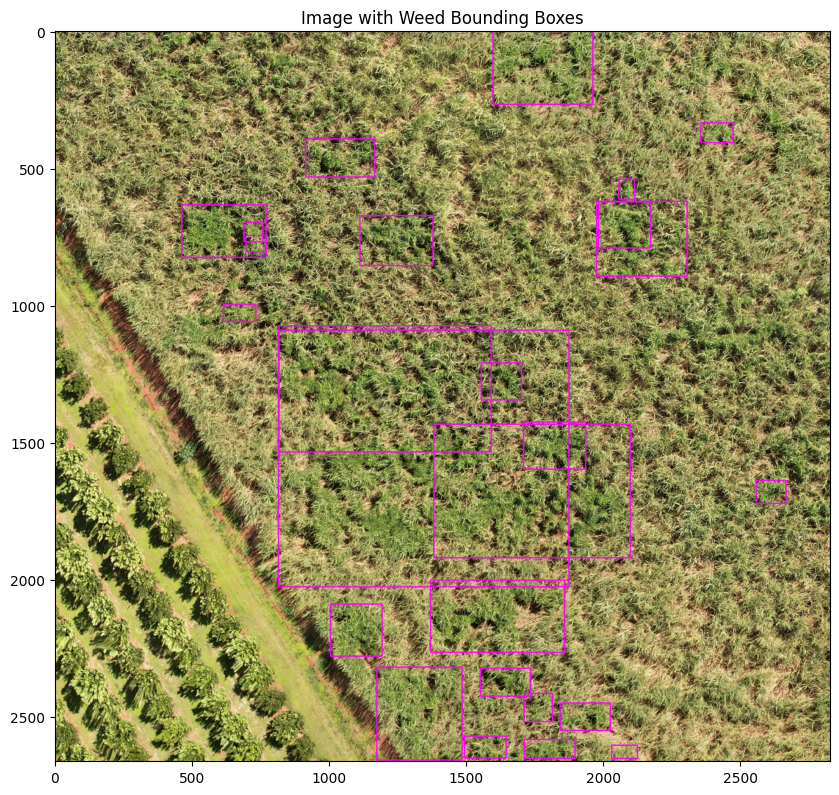

In [35]:
import os
import cv2
import shapefile
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Define paths
path_to_test_dataset = 'IMAGE/'
path_to_store_bounding_boxes = 'detect/'
path_to_save_shapefile = 'weed_detections_3.shp'

# Ensure the output directories exist
os.makedirs(path_to_store_bounding_boxes, exist_ok=True)

# Mapping of class labels to readable names (assuming 'weeds' is class 1)
class_names = ["citrus area", "trees", "weeds", "weeds and trees" ]

# Function to convert pixel coordinates to geographical coordinates
def convert_pixel_to_latlon(x, y, image_width, image_height, image_coords):
    top_left, top_right, bottom_right, bottom_left = image_coords
    
    lon_top = top_left[0] + (top_right[0] - top_left[0]) * (x / image_width)
    lon_bottom = bottom_left[0] + (bottom_right[0] - bottom_left[0]) * (x / image_width)
    lat_left = top_left[1] + (bottom_left[1] - top_left[1]) * (y / image_height)
    lat_right = top_right[1] + (bottom_right[1] - top_right[1]) * (y / image_height)
    
    lon = lon_top + (lon_bottom - lon_top) * (y / image_height)
    lat = lat_left + (lat_right - lat_left) * (x / image_width)
    
    return lon, lat

# Function to create a shapefile with image dimensions and bounding boxes
def create_shapefile_with_latlon(bboxes, image_shape, image_coords, shapefile_path):
    w = shapefile.Writer(shapefile_path)
    w.field('id', 'C')

    img_width, img_height = image_shape

    # Add bounding boxes for weeds
    for idx, (x1, y1, x2, y2) in enumerate(bboxes):
        top_left = convert_pixel_to_latlon(x1, y1, img_width, img_height, image_coords)
        top_right = convert_pixel_to_latlon(x2, y1, img_width, img_height, image_coords)
        bottom_left = convert_pixel_to_latlon(x1, y2, img_width, img_height, image_coords)
        bottom_right = convert_pixel_to_latlon(x2, y2, img_width, img_height, image_coords)

        poly = Polygon([top_left, top_right, bottom_right, bottom_left, top_left])
        w.poly([poly.exterior.coords])
        w.record(f'weed_{idx}')

    w.close()

# Load the image
image_path = 'IMAGE/03.png'  # Replace with your actual image path
image = cv2.imread(image_path)
image_height, image_width, _ = image.shape
imagename_withoutextension = os.path.splitext(os.path.basename(image_path))[0]

# Perform model prediction
results = model.predict(image_path, imgsz=640, conf=0.2, iou=0.4)
results = results[0]

weed_bboxes = []

for i, box in enumerate(results.boxes):
    tensor = box.xyxy[0]
    x1 = int(tensor[0].item())
    y1 = int(tensor[1].item())
    x2 = int(tensor[2].item())
    y2 = int(tensor[3].item())
    conf = box.conf[0].item()  # Confidence score
    label = box.cls[0].item()  # Class label

    # Debugging output to ensure boxes are detected
    print(f"Box {i}: ({x1}, {y1}), ({x2}, {y2}), label: {label}, confidence: {conf}")

    # Only process if the detected class is "weeds"
    if class_names[int(label)] == "weeds":
        print("weed detected")
        # Draw bounding box on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 255), 3)
        # Save the bounding box coordinates
        weed_bboxes.append((x1, y1, x2, y2))

# Save the image with bounding boxes
cv2.imwrite(os.path.join(path_to_store_bounding_boxes, imagename_withoutextension + ".png"), image)

# Create the shapefile with bounding boxes converted to lat/lon
create_shapefile_with_latlon(weed_bboxes, (image_width, image_height), image_coords_3, path_to_save_shapefile)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image with Weed Bounding Boxes")
plt.axis('on')
plt.show()


In [43]:
shp_file = gpd.read_file('weed_detections.shp')

In [44]:
shp_file

,id,geometry
0,weed_0,"POLYGON ((-48.88597 -20.59109, -48.88593 -20.5..."
1,weed_1,"POLYGON ((-48.88647 -20.59106, -48.88642 -20.5..."
2,weed_2,"POLYGON ((-48.88613 -20.59080, -48.88610 -20.5..."
3,weed_3,"POLYGON ((-48.88620 -20.59088, -48.88617 -20.5..."
4,weed_4,"POLYGON ((-48.88599 -20.59078, -48.88594 -20.5..."
5,weed_5,"POLYGON ((-48.88603 -20.59086, -48.88594 -20.5..."
6,weed_6,"POLYGON ((-48.88597 -20.59133, -48.88594 -20.5..."
7,weed_7,"POLYGON ((-48.88597 -20.59141, -48.88594 -20.5..."
8,weed_8,"POLYGON ((-48.88612 -20.59120, -48.88607 -20.5..."
9,weed_9,"POLYGON ((-48.88606 -20.59079, -48.88602 -20.5..."


<Axes: >

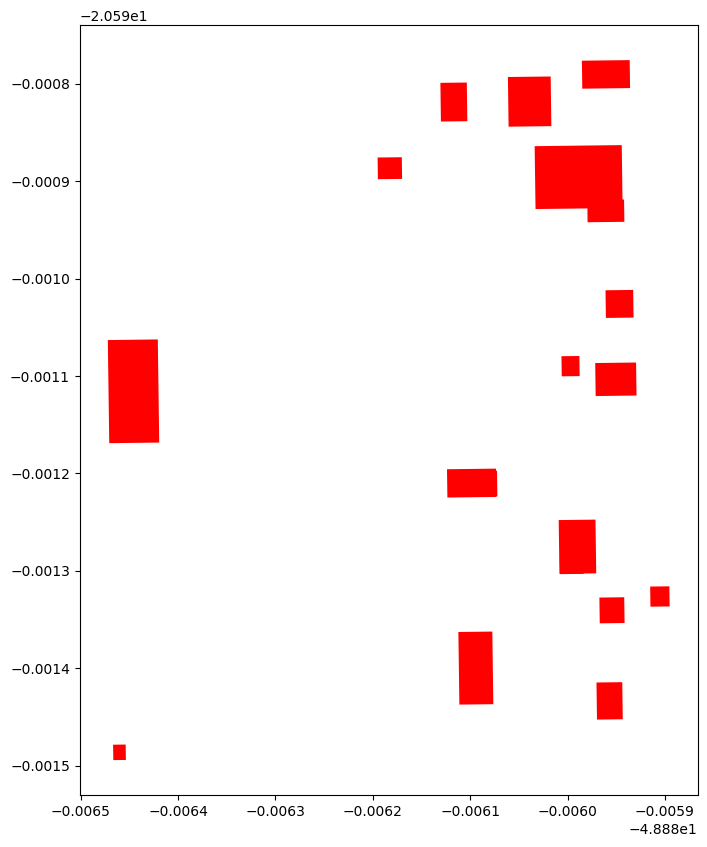

In [45]:
shp_file.plot(figsize=(10, 10), color='red')

## Making reuseable functions

In [ ]:
import os
import cv2
import zipfile
import shapefile
import numpy as np
import streamlit as st
from io import BytesIO
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from PIL import Image

# Define paths
path_to_store_bounding_boxes = 'detect/'
path_to_save_shapefile = 'weed_detections.shp'

# Ensure the output directories exist
os.makedirs(path_to_store_bounding_boxes, exist_ok=True)

# Mapping of class labels to readable names (assuming 'weeds' is class 1)
class_names = ["citrus area", "trees", "weeds", "weeds and trees" ]

# Function to convert pixel coordinates to geographical coordinates
def convert_pixel_to_latlon(x, y, image_width, image_height, image_coords):
    top_left, top_right, bottom_right, bottom_left = image_coords
    
    lon_top = top_left[0] + (top_right[0] - top_left[0]) * (x / image_width)
    lon_bottom = bottom_left[0] + (bottom_right[0] - bottom_left[0]) * (x / image_width)
    lat_left = top_left[1] + (bottom_left[1] - top_left[1]) * (y / image_height)
    lat_right = top_right[1] + (bottom_right[1] - top_right[1]) * (y / image_height)
    
    lon = lon_top + (lon_bottom - lon_top) * (y / image_height)
    lat = lat_left + (lat_right - lat_left) * (x / image_width)
    
    return lon, lat

# Function to create a shapefile with image dimensions and bounding boxes
def create_shapefile_with_latlon(bboxes, image_shape, image_coords, shapefile_path):
    w = shapefile.Writer(shapefile_path)
    w.field('id', 'C')

    img_width, img_height = image_shape

    # Add bounding boxes for weeds
    for idx, (x1, y1, x2, y2) in enumerate(bboxes):
        top_left = convert_pixel_to_latlon(x1, y1, img_width, img_height, image_coords)
        top_right = convert_pixel_to_latlon(x2, y1, img_width, img_height, image_coords)
        bottom_left = convert_pixel_to_latlon(x1, y2, img_width, img_height, image_coords)
        bottom_right = convert_pixel_to_latlon(x2, y2, img_width, img_height, image_coords)

        poly = Polygon([top_left, top_right, bottom_right, bottom_left, top_left])
        w.poly([poly.exterior.coords])
        w.record(f'weed_{idx}')

    w.close()

# Streamlit UI
st.title("Weed Detection and Shapefile Creation")

# Input coordinates for image corners
st.sidebar.header("Image Coordinates")
top_left = st.sidebar.text_input("Top Left (lon, lat)", value="-48.8859, -20.5909")
top_right = st.sidebar.text_input("Top Right (lon, lat)", value="-48.8869, -20.5909")
bottom_right = st.sidebar.text_input("Bottom Right (lon, lat)", value="-48.8869, -20.5900")
bottom_left = st.sidebar.text_input("Bottom Left (lon, lat)", value="-48.8859, -20.5900")

# Convert input coordinates to tuples
image_coords = [
    tuple(map(float, top_left.split(','))),
    tuple(map(float, top_right.split(','))),
    tuple(map(float, bottom_right.split(','))),
    tuple(map(float, bottom_left.split(',')))
]

# Upload image
uploaded_image = st.file_uploader("Upload an image", type=["png", "jpg", "jpeg"])

if uploaded_image is not None:
    # Display uploaded image
    st.image(uploaded_image, caption="Uploaded Image", use_column_width=True)
    img = Image.open(uploaded_image)
    img_array = np.array(img)
    image_height, image_width, _ = img_array.shape

    # Perform weed detection on button click
    if st.button("Detect Weeds"):
        # Perform model prediction
        results = model.predict(uploaded_image, imgsz=640, conf=0.2, iou=0.4)
        results = results[0]

        weed_bboxes = []

        for i, box in enumerate(results.boxes):
            tensor = box.xyxy[0]
            x1 = int(tensor[0].item())
            y1 = int(tensor[1].item())
            x2 = int(tensor[2].item())
            y2 = int(tensor[3].item())
            conf = box.conf[0].item()  # Confidence score
            label = box.cls[0].item()  # Class label

            # Debugging output to ensure boxes are detected
            print(f"Box {i}: ({x1}, {y1}), ({x2}, {y2}), label: {label}, confidence: {conf}")

            # Only process if the detected class is "weeds"
            if class_names[int(label)] == "weeds":
                print("weed detected")
                # Draw bounding box on the image
                cv2.rectangle(img_array, (x1, y1), (x2, y2), (255, 0, 255), 3)
                # Save the bounding box coordinates
                weed_bboxes.append((x1, y1, x2, y2))

        # Save the image with bounding boxes
        detected_image_path = os.path.join(path_to_store_bounding_boxes, "detected_image.png")
        cv2.imwrite(detected_image_path, cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR))

        # Display the image with bounding boxes
        st.image(img_array, caption="Detected Weeds", use_column_width=True)

        # Create shapefile on button click
        if st.button("Create Shapefile"):
            create_shapefile_with_latlon(weed_bboxes, (image_width, image_height), image_coords, path_to_save_shapefile)

            # Display shapefile plot
            fig, ax = plt.subplots()
            sf = shapefile.Reader(path_to_save_shapefile)
            for shape in sf.shapes():
                poly = Polygon(shape.points)
                x, y = poly.exterior.xy
                ax.plot(x, y)
            plt.show()
            st.pyplot(fig)

            # Create ZIP file of the shapefile components
            zip_buffer = BytesIO()
            with zipfile.ZipFile(zip_buffer, 'w') as zip_file:
                for filename in ['weed_detections.shp', 'weed_detections.shx', 'weed_detections.dbf']:
                    zip_file.write(filename, os.path.basename(filename))
            zip_buffer.seek(0)

            # Download ZIP file
            st.download_button(
                label="Download Shapefile ZIP",
                data=zip_buffer,
                file_name="weed_detections.zip",
                mime="application/zip"
            )
